# Datasets collection 
## Main dataset
- Semval dataset

## Data for corpus
1.  Tweeter Corpus POS: https://www.aclweb.org/anthology/W18-3503/
2.  https://github.com/sakshigupta93/normalisation-dataset/blob/master/dataset_final.txt
3. https://github.com/drimpossible/Sub-word-LSTM/blob/master/Data/IIITH_Codemixed.txt (https://www.aclweb.org/anthology/C16-1234.pdf)
4. https://www.aclweb.org/anthology/W14-3914.pdf(check this out)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#convert to sentances for corpus 1

def read_POS_data(idGen,in_file):
    data = []
    with open(in_file) as f:
        words = " "
        cnt = 0
        for line in f.readlines():
            # print(line)
            sp = line.strip().split('\t')
            if len(sp)<3:
              vc = {"id":idGen+str(cnt),"tweet":words}
              data.append(vc)
              words = ""
              cnt += 1
            else:
              words = words + sp[0] + " "
        print(cnt)
    return data 

def read_IIITH_DATA(in_file):
    data = []
    with open(in_file) as f:
        words = " "
        cnt = 0
        for line in f.readlines():
            sp = line.strip().split('\t')
            vc = {"id":sp[0],"label":sp[-1],"tweet":sp[1]}
            data.append(vc);
            cnt += 1
           
        print(cnt)
    return data 


In [ ]:
datasetPath1 = "/content/POS.tsv"
datasetPath2 = "/content/dataset_final.txt"

corpus1 = read_POS_data("random1",datasetPath1)[1:]
corpus1 = pd.DataFrame(corpus1)
print("Corpus 1: ",corpus1.head())

corpus2 = read_POS_data("random2",datasetPath2)[1:]
corpus2 = pd.DataFrame(corpus2)
print("Corpus 2: ",corpus2.head())




1489
Corpus 1:           id                                              tweet
0  random11  @ncpspeaks former Gen . V P Malik aur DGMO Vin...
1  random12  Anyone heard of hafiz saeed , salahuddin or ma...
2  random13  @ArvindKejriwal Worldwide #SurgicalStrike vdo ...
3  random14  RT @UsmanAQayyum : Pak : Acha Dikao Zara Saboo...
4  random15  All Netas demanding proof of #SurgicalStrike ,...
1446
Corpus 2:           id                                              tweet
0  random21                                Call kar leti hoon 
1  random22  Light hai abhi , I'll try attending one myself . 
2  random23            agar attendance lag gayi toh badhiya . 
3  random24              main kal aayungi shaadi mei directly 
4  random25  room mei shayad kal bhi nahi stay karungi , ca...


In [ ]:
corpus = pd.concat([corpus1,corpus2])
print(len(corpus))


2933


In [ ]:
#for dataset 3
datasetPath = "/content/IIITH_Codemixed.txt"
Train = read_IIITH_DATA(datasetPath)[1:]
Train = pd.DataFrame(Train)
Train.head()


3879


,id,label,tweet
0,3,2,Love u sir love u soo much urs I'ts beautyful ...
1,4,1,Arae sur jee pahelae hamare bharat ke bachho k...
2,5,2,Wah! Jitni sundar geet ke bhao hain utnihi sun...
3,8,2,Sundar ekdam sahi Gaya Hua gana.chhotisi gudiy...
4,9,2,Wao lata mangekar


In [ ]:
print(Train.isnull().values.any())

False


In [ ]:
#change labels
Train["label"] = Train["label"].map({"0":"negative","1":"neutral","2":"positive"})
Train.head()

,id,label,tweet
0,3,positive,Love u sir love u soo much urs I'ts beautyful ...
1,4,neutral,Arae sur jee pahelae hamare bharat ke bachho k...
2,5,positive,Wah! Jitni sundar geet ke bhao hain utnihi sun...
3,8,positive,Sundar ekdam sahi Gaya Hua gana.chhotisi gudiy...
4,9,positive,Wao lata mangekar


In [ ]:
#convert to sentances

def read_conll(in_file, lowercase=False, max_example=None):
    data = []
    with open(in_file) as f:
        words = " "
        id = "";
        label = "";
        for line in f.readlines():
            sp = line.strip().split('\t')
            if sp[0]=="meta" and len(sp)>2:
              vc = {"id":id,"label":label,"tweet":words}
              data.append(vc);
              words = " "
              id = sp[1]
              label = sp[2]
            elif len(sp)>1:
              if sp[1]!="O":
                words = words + sp[0] +" " #+"("+sp[1]+") "
        vc = {"id":id,"label":label,"tweet":words}
        data.append(vc);
    return data 

def read_conll_test(in_file, lowercase=False, max_example=None):
    data = []
    with open(in_file) as f:
        words = " "
        id = "";
        label = "";
        for line in f.readlines():
            sp = line.strip().split('\t')
            if sp[0]=="meta":
              vc = {"id":id,"tweet":words}
              data.append(vc);
              words = " "
              id = sp[1]
            elif len(sp)>1:
              if sp[1]!="O":
                words = words + sp[0] +" " # +"("+sp[1]+") "
        vc = {"id":id,"tweet":words}
        data.append(vc);
    return data 

In [ ]:
dataset = "/content/test.txt"
test = read_conll_test(dataset)[1:]
test = pd.DataFrame(test)
test.head()


,id,tweet
0,20803,454dkhan Heisunberg Agr kse ko itni important...
1,20187,logon ko alloo pyaz tomator me toh allah pak ...
2,20953,LambaAlka Wafadaar bane rahane ka nayab tarik...
3,13777,varnishant narendramodi Chup bhosdike He has ...
4,20990,RT HardeepSPuri Praise the Great Giver who gi...


In [ ]:
labels = pd.read_csv("/content/test_labels.txt")
labels = pd.DataFrame(labels)
labels.columns=["id","label"] 
labels['id']=labels['id'].astype(str)
labels.head()

,id,label
0,20803,neutral
1,20187,neutral
2,20953,neutral
3,13777,negative
4,20990,positive


In [ ]:
# test = pd.concat([test, labels], axis = 1)
test = pd.merge(test, labels, how='inner', on = 'id')
test.head()

,id,tweet,label
0,20803,454dkhan Heisunberg Agr kse ko itni important...,neutral
1,20187,logon ko alloo pyaz tomator me toh allah pak ...,neutral
2,20953,LambaAlka Wafadaar bane rahane ka nayab tarik...,neutral
3,13777,varnishant narendramodi Chup bhosdike He has ...,negative
4,20990,RT HardeepSPuri Praise the Great Giver who gi...,positive


In [ ]:
import pandas as pd
dataset1 = '/content/train.txt'
dataset2 = '/content/valid.txt'

train = read_conll(dataset1)[1:];
valid = read_conll(dataset2)[1:];
train = pd.DataFrame(train)
valid = pd.DataFrame(valid)

valid.head()

,id,label,tweet
0,30258,positive,prahladspatel modi mantrimandal may samil hon...
1,16648,negative,bkunalraj TajinderBagga NikhilJakhar14 JammuP...
2,28511,negative,waglenikhil U saw caste and religion in them ...
3,10466,neutral,DelhiPolice sir local police station pe compl...
4,19266,positive,Ve Maahi song from Kesari is current favourit...


In [ ]:
print(train['tweet'][0])

 nen vist bolest vztek smutek zmatek osam lost beznad j a nakonec jen klid Asi takhle vypad m j life 


In [ ]:
import numpy as np

#split the IIITH data
print("ToTOAL " ,len(Train))

msk = np.random.rand(len(Train)) < 0.8
df1 = Train[msk]
df2 = Train[~msk]
print("TRAIN", len(df1)," Valid: ",len(df2))

ToTOAL  3878
TRAIN 3106  Valid:  772


In [ ]:
# MERGE the IIITH and semval
train = pd.concat([train,df1])
valid = pd.concat([valid,df2])
print("TRAIN", len(train)," Valid: ",len(valid))

TRAIN 17106  Valid:  3772


In [ ]:
train.to_csv("Train.csv")
valid.to_csv("Valid.csv")
test.to_csv("Test.csv")


In [ ]:
Trainx = pd.read_csv("/content/Train.csv")
Validx = pd.read_csv("/content/Valid.csv")
Testx = pd.read_csv("/content/Test.csv")

In [ ]:
Trainx = Trainx.reset_index()
Validx = Validx.reset_index()
Testx = Testx.reset_index()

In [ ]:
print(Trainx['tweet'][0])
print(Testx.isna().any().any())

 nen vist bolest vztek smutek zmatek osam lost beznad j a nakonec jen klid Asi takhle vypad m j life 
False


In [ ]:
tx=Trainx['tweet']
ty = Trainx['label']
vx = Validx['tweet']
vy = Validx['label']
tex = Testx['tweet']
tey = Testx['label']

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
list1 =[]
for i in range(0, len(tx)):
    title = tx[i]
    
    if i==1560:
        print(title)
    title = re.sub("@ [\w]+",'',title)
    title=re.sub(r'http[s]?.*$', '', title)
    
    title = re.sub('([^A-Za-z \t])|(\w+:\/\/\S+)', '', title)
    if i==1560:
        print(title)
    title = title.lower()
    title = title.split()
    title = [word for word in title if not word in stopwords.words('english')]  
    title = ' '.join(title)
    list1.append(title)
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
 RT Rahul31316222 https t co BfQUHJIB7C Gud nyt guys with his emotional song jise sunkar sari tension chli jayegi only mom ko hug krn 
 RT Rahul 


In [ ]:
list2 =[]
for i in range(0, len(vx)):
    title = vx[i]
    title = re.sub("@ [\w]+",'',title)
    title=re.sub(r'http[s]?.*$', '', title)    
    title = re.sub('([^A-Za-z \t])|(\w+:\/\/\S+)', '', title)

    title = title.lower()
    title = title.split()
    title = [word for word in title if not word in stopwords.words('english')]  
    title = ' '.join(title)
    list2.append(title)

list3 =[]
for i in range(0, len(tex)):
    title = tex[i]
    title = re.sub("@ [\w]+",'',title)
    title=re.sub(r'http[s]?.*$', '', title)    
    title = re.sub('([^A-Za-z \t])|(\w+:\/\/\S+)', '', title)

    title = title.lower()
    title = title.split()
    title = [word for word in title if not word in stopwords.words('english')]  
    title = ' '.join(title)
    list3.append(title)


In [ ]:

print(list1[0])
print(list2[0])
print(list3[0])
print(len(list1))
print(len(ty))
print(len(list2))
print(len(vy))
print(len(list3))
print(len(tey))

nen vist bolest vztek smutek zmatek osam lost beznad j nakonec jen klid asi takhle vypad j life
prahladspatel modi mantrimandal may samil honay par badhai narmaday har
dkhan heisunberg agr kse ko itni importantce chaeay ni tou
17106
17106
3772
3772
3000
3000


In [ ]:
t1 = []
l1 = []
t2 = []
l2 = []
t3 = []
l3 = []
for i in range(0,len(list1)):
    title = list1[i].split()    
    if len(title)>3:
        t1.append(list1[i])
        l1.append(ty[i])
for i in range(0,len(list2)):
    title = list2[i].split()    
    if len(title)>3:
        t2.append(list2[i])
        l2.append(vy[i])
for i in range(0,len(list3)):
    title = list3[i].split()    
    if len(title)>3:
        t3.append(list3[i])
        l3.append(tey[i])

In [ ]:
print(len(t1))
print(len(l1))
print(len(t2))
print(len(l2))
print(len(t3))
print(len(l3))

16642
16642
3670
3670
2993
2993


In [ ]:
dict = {}
for i in range(0, len(t1)):
    x = t1[i].split()
    for words in x:
        if words in dict:   
        # If the word exists in dictionary then simply increase its count           
            dict[words] += 1             
        else:  
        # If the word does not exists in dictionary update the dictionary and make its count 1   
            dict.update({words: 1}) 

voc_size = len(dict) 

print(voc_size)
maxSentenceLength = max([len(i) for i in t1])
print(maxSentenceLength)

41536
416


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model,Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM ,Bidirectional
from keras.layers import Embedding
from keras.layers import Dropout,SpatialDropout1D
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam,SGD,RMSprop

In [ ]:
to1 = Tokenizer(num_words=voc_size)
to1.fit_on_texts(t1)

wordToSequenceTrain=to1.texts_to_sequences(t1)
print(wordToSequenceTrain[2])
padSequenceTrain=pad_sequences(wordToSequenceTrain,padding='post',truncating='post',maxlen=maxSentenceLength)


wordToSequenceVal=to1.texts_to_sequences(t2)
padSequenceVal=pad_sequences(wordToSequenceVal,padding='post',truncating='post',maxlen=maxSentenceLength)

wordToSequenceTest=to1.texts_to_sequences(t3)
padSequenceTest=pad_sequences(wordToSequenceTest,padding='post',truncating='post',maxlen=maxSentenceLength)


[140, 7352, 90, 58, 6, 50, 23, 16, 11, 67, 124, 158, 295, 14, 268, 97, 751, 97, 2, 58, 6]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

l1 = np.array(l1)
l2 = np.array(l2)
l3 = np.array(l3)

lable = LabelEncoder()
Label_train = lable.fit_transform(l1)
print(Label_train.shape)
y1 = to_categorical(Label_train,num_classes=3)

lable = LabelEncoder()
Label_val = lable.fit_transform(l2)
print(Label_val.shape)
y2 = to_categorical(Label_val,num_classes=3)

lable = LabelEncoder()
Label_test = lable.fit_transform(l3)
print(Label_test.shape)
y3 = to_categorical(Label_test,num_classes=3)

(16642,)
(3670,)
(2993,)


In [ ]:
x_train=np.array(padSequenceTrain)
y_train = np.array(y1)

x_val=np.array(padSequenceVal)
y_val = np.array(y2)

x_test=np.array(padSequenceTest)
y_test = np.array(y3)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[1])
print(y_train[1])

(16642, 416)
(16642, 3)
(3670, 416)
(3670, 3)
(2993, 416)
(2993, 3)
[15419   907   447  3745   291   679   339   402  1782    25   476    57
 15420   197   181   198   339   402   679     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0  

In [ ]:
embedding_vector_features=50
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features, mask_zero=True,trainable=True))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(64,dropout=0.7, recurrent_dropout=0.7)))
model.add(Dense(512,activation='relu'))
model.add(Dense(3,activation='softmax'))
#opt = SGD(lr=0.0001)
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          2076800   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 50)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               58880     
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 2,203,267
Trainable params: 2,203,267
Non-trainable params: 0
_________________________________________________________________
None


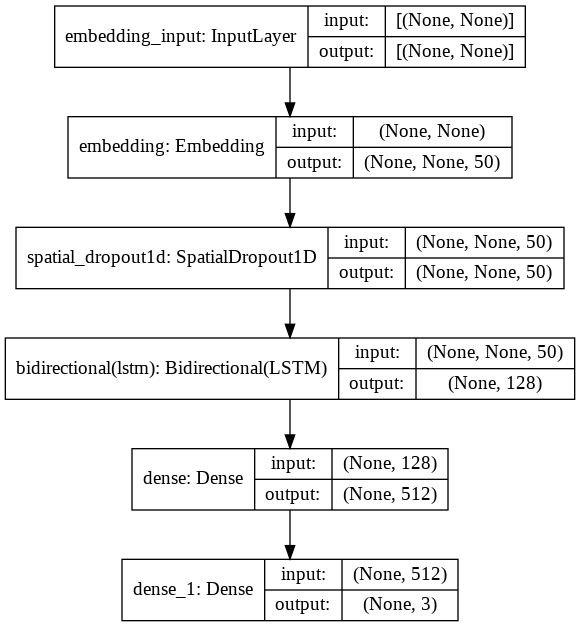

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15,batch_size=128)
model.save('/content/rnn_model.h5')
model.save_weights('/content/rnn_weight.h5')

Epoch 1/15
131/131 [==============================] - 403s 3s/step - loss: 1.0949 - accuracy: 0.3873 - val_loss: 1.0841 - val_accuracy: 0.4011
Epoch 2/15
131/131 [==============================] - 401s 3s/step - loss: 1.0826 - accuracy: 0.3851 - val_loss: 1.0111 - val_accuracy: 0.4771
Epoch 3/15
131/131 [==============================] - 403s 3s/step - loss: 0.9738 - accuracy: 0.5078 - val_loss: 0.9065 - val_accuracy: 0.5711
Epoch 4/15
131/131 [==============================] - 394s 3s/step - loss: 0.8898 - accuracy: 0.5712 - val_loss: 0.8859 - val_accuracy: 0.5787
Epoch 5/15
131/131 [==============================] - 394s 3s/step - loss: 0.8566 - accuracy: 0.5984 - val_loss: 0.8692 - val_accuracy: 0.5929
Epoch 6/15
131/131 [==============================] - 400s 3s/step - loss: 0.8112 - accuracy: 0.6374 - val_loss: 0.8598 - val_accuracy: 0.5926
Epoch 7/15
131/131 [==============================] - 399s 3s/step - loss: 0.7751 - accuracy: 0.6533 - val_loss: 0.8586 - val_accuracy: 0.6000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


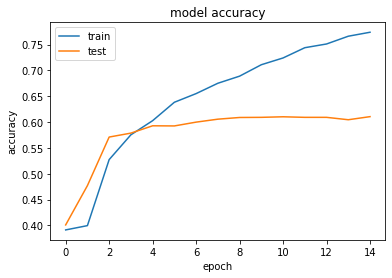

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


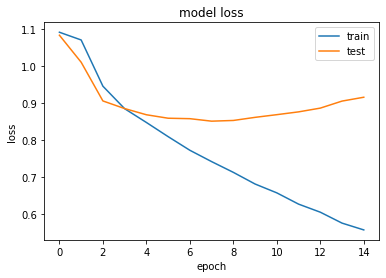

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper_left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper_left')

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from keras.models import load_model

# load model
model = load_model('/content/rnn_model.h5')

score = model.evaluate(padSequenceTest,y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 66.02%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
ytest=np.argmax(y3,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(ytest, y_pred)
print(confusion_matrix(ytest, y_pred))

Confusion Matrix
[[580 297  23]
 [190 715 191]
 [ 24 292 681]]


In [ ]:
target_names = ['neutral','negative','positive']
print(classification_report(ytest, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     neutral       0.73      0.64      0.68       900
    negative       0.55      0.65      0.60      1096
    positive       0.76      0.68      0.72       997

    accuracy                           0.66      2993
   macro avg       0.68      0.66      0.67      2993
weighted avg       0.67      0.66      0.66      2993



Normalized confusion matrix


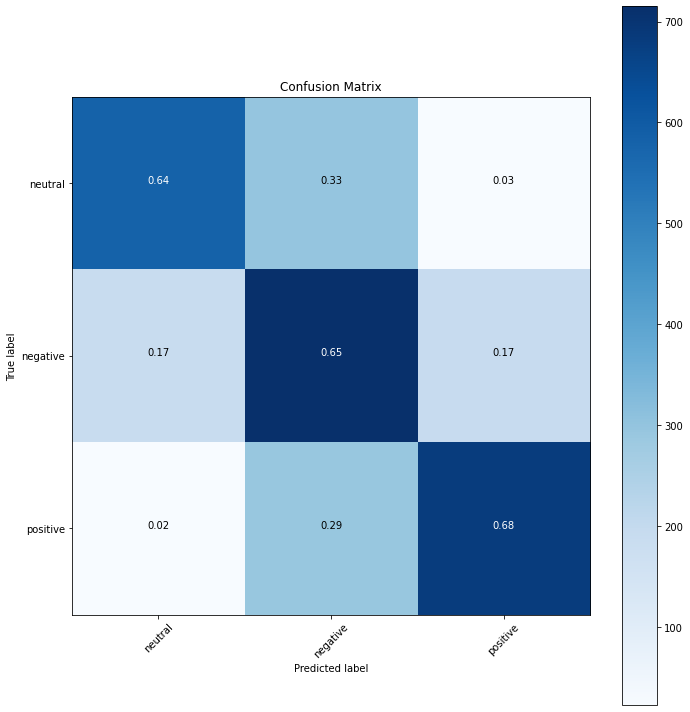

In [ ]:
import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

# Semval results

https://arxiv.org/pdf/2008.04277.pdf

# New Section